In [ ]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 8.9 MB/s eta 0:00:00
  Atte

In [ ]:
!pip install scikeras==0.12.0

In [ ]:
!pip uninstall -y scikit-learn

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1


In [ ]:
!pip install scikit-learn==1.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 28.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [ ]:
import tensorflow as tf
import sklearn

print("TensorFlow:", tf.__version__)
print("Scikit-learn:", sklearn.__version__)
print("Keras location:", tf.keras.__file__)

TensorFlow: 2.12.0
Scikit-learn: 1.3.1
Keras location: /usr/local/lib/python3.11/dist-packages/keras/api/_v2/keras/__init__.py


# Glass Type Classification and NLP on Amazon Kindle Reviews

## Introduction
This notebook addresses the assessment task of classifying glass types using a simple neural network and applying NLP techniques to clean and classify product reviews from the Amazon Kindle Store. The project is divided into two main parts:

1. Classification of Glass Types using a Simple Neural Network
2. Natural Language Processing on Amazon Kindle Store Reviews
3. Classification of ratings on Amazon Kindle Store Reviews
4. Enhancing Customer Support using Open API LLM



## Part 1: Glass Type Classification

### Import Libraries & DataSet

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing & Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from scikeras.wrappers import KerasClassifier

# Model Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Google Colab-Specific Utilities (Optional if you're using Jupyter locally)
from google.colab import files  #

In [ ]:
# Load dataset
glass_data = pd.read_csv("glass_data.csv")

The dataset containing glass data will be loaded using Pandas.

### Load and Explore Dataset

#### Display basic information about the dataset

In [ ]:
glass_data.info()
glass_data.describe()
glass_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      214 non-null    int64  
 1   ri      214 non-null    float64
 2   na      214 non-null    float64
 3   mg      214 non-null    float64
 4   al      214 non-null    float64
 5   si      214 non-null    float64
 6   k       214 non-null    float64
 7   ca      214 non-null    float64
 8   ba      214 non-null    float64
 9   fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### Why display the basic data?
Understanding the data before modeling is important.
I inspected the dataset for basic information, including data types, missing values, and statistical summaries. This helped m,e decide what preprocessing steps i needed to do.

#### Check for missing values

In [ ]:
glass_data.isnull().sum()

,0
id,0
ri,0
na,0
mg,0
al,0
si,0
k,0
ca,0
ba,0
fe,0


### Preprocess Data

#### Encoding target variable

In [ ]:
y = glass_data.iloc[:, -1].astype('category').cat.codes

#### Splitting features and labels

In [ ]:
X = glass_data.iloc[:, :-1]
y = glass_data.iloc[:, -1].astype('category').cat.codes

#### Normalize the data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Split data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Save and download the cleaned data

In [ ]:
glass_data.to_csv("cleaned_glass_data.csv", index=False)

In [ ]:
files.download("cleaned_glass_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Define the Model

In [ ]:
def create_glass_model(optimizer='adam', dropout_rate=0.3, units=128, input_shape=9, output_units=6):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(input_shape,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_units, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

### Hyperparameter Optimization

####  Define the Hyperparameter Grid

In [ ]:
param_grid_glass = {
    'batch_size': [32],
    'epochs': [50],
    'optimizer': ['adam'],
    'dropout_rate': [0.2, 0.3],
    'units': [64, 128]
}

#### Wrap the Glass Model

In [ ]:
model_glass = KerasClassifier(
    model=create_glass_model,
    optimizer='adam',
    dropout_rate=0.3,
    units=128,
    input_shape=X_train.shape[1],
    output_units=len(np.unique(y_train)),
    epochs=50,
    batch_size=32,
    verbose=0
)

#### Grid Search

In [ ]:
grid_glass = GridSearchCV(estimator=model_glass, param_grid=param_grid_glass, cv=3, verbose=1, n_jobs=1)

In [ ]:
grid_result_glass = grid_glass.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


#### Best Parameters


In [ ]:
print(f"Best: {grid_result_glass.best_score_} using {grid_result_glass.best_params_}")

Best: 0.9064327485380117 using {'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 50, 'optimizer': 'adam', 'units': 128}


### Interpreting the Results


#### Make predictions on the tes set

In [ ]:
y_pred = grid_result_glass.predict(X_test)

#### Print accuracy

In [ ]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9302325581395349


#### Print classification report

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93        14
           2       1.00      1.00      1.00         3
           3       1.00      0.50      0.67         4
           4       1.00      0.67      0.80         3
           5       0.89      1.00      0.94         8

    accuracy                           0.93        43
   macro avg       0.96      0.86      0.89        43
weighted avg       0.94      0.93      0.92        43



#### Generate confusion matrix and plot it

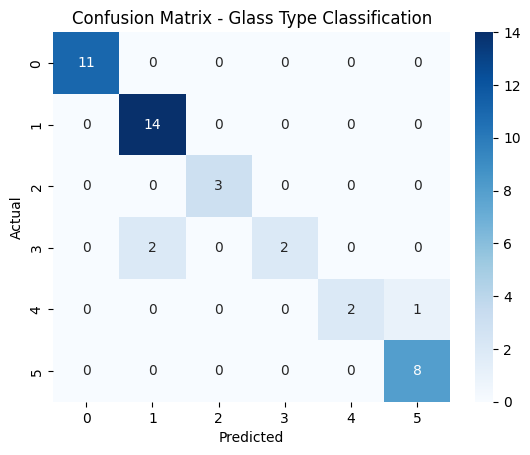

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Glass Type Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Summary

The model worked wel. It got high test accuracy and only making a few mistakes. The confusion matrix and classification report show that the neural network got most of the glass types right, but there was a few mix-ups between similar ones.
This just means that the model was able to learn patterns in the data. These tools are commonly used in machine learning to check how well models are doing (Ahmed, 2025a; Ahmed, 2025d).

## Part 2: Data Cleaning with Natural Language Processing (NLP)


### Import Libraries & DataSet

### Installing NLTK Packages

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Why Do We Need These Downloads?**



1. **Punkt**:


Used for tokenization (splitting text into words or sentences).
Essential for functions like `word_tokenize()` which break down a text into individual words.

  
2.   **Stopwords**:


Contains a list of common words that are often removed during text preprocessing, such as "and", "the", "is".
Helps in eliminating words that do not contribute significantly to the meaning of the text.

3. **Wordnet**:


A lexical database of English, useful for lemmatization (reducing words to their base or root form). Essential for `WordNetLemmatizer()` to work.

#### Setting NLTK Data Path

In [ ]:
import os
nltk.data.path.append('/usr/share/nltk_data')

**Why Set the NLTK Data Path?**

1. Colab Environment Issue:
<br>
In Google Colab often doesn't automatically set the path where NLTK looks for data so NLTK sometimes struggles to locate the downloaded data files.


2. Specifying the Path Manually:
<br>

The line `os.environ['NLTK_DATA'] = '/usr/share/nltk_data'` explicitly tells Python where to find the NLTK data. This ensures that NLTK functions like word_tokenize() and stopword removal work without errors.

**Why This Path Specifically**:
<br>

I used `download_dir='/usr/share/nltk_data'` when downloading NLTK data.
Setting the environment variable to this path matches where the data was stored, avoiding the "Resource not found" error.

#### Importing Required Libraries

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
# Load dataset
all_kindle_review = pd.read_csv("all_kindle_review.csv")

The dataset containing Amazon Kindle Store product reviews (from May 1996 to July 2014) will be loaded using Pandas.

#### Display basic information about the dataset

In [ ]:
all_kindle_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    12000 non-null  int64 
 1   Unnamed: 0      12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         11998 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


In [ ]:
all_kindle_review.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [ ]:
all_kindle_review.describe()

,Unnamed: 0.1,Unnamed: 0,rating,unixReviewTime
count,12000.00000,12000.000000,12000.000000,1.200000e+04
mean,5999.50000,10024.275667,3.250000,1.344537e+09
std,3464.24595,10502.233123,1.421619,4.369374e+07
min,0.00000,0.000000,1.000000,9.602496e+08
25%,2999.75000,2999.750000,2.000000,1.316218e+09
50%,5999.50000,5999.500000,3.500000,1.356826e+09
75%,8999.25000,12475.750000,4.250000,1.376870e+09
max,11999.00000,47770.000000,5.000000,1.405814e+09


### Data Cleaning

#### Basic data cleaning


##### Check for duplicates

In [ ]:
if all_kindle_review.duplicated().sum() > 0:
    print("Duplicate Rows Preview:")
    print(all_kindle_review[all_kindle_review.duplicated()].head())
else:
    print("No duplicate rows found.")

print(f'Number of duplicate rows: {all_kindle_review.duplicated().sum()}')

No duplicate rows found.
Number of duplicate rows: 0


**Why view the duplicates?**

By making myself check for fully duplicated rows, I maintain data quality and remove redundancies. Printing a few examples of duplicate rows before removing them helps verify their nature and determine whether they should be kept or discarded.


##### Remove duplicate rows

In [ ]:
all_kindle_review = all_kindle_review.drop_duplicates()
print(f'Number of duplicates removed: {all_kindle_review.shape[0]}')

Number of duplicates removed: 12000


**Why remove duplicates?**

This step is crucial for maintaining the accuracy of the model, as duplicate data can cause bias in training. According to Ahmed (2025a), maintaining data quality is essential to ensure reliable classification outcomes. and not skewed by repeated entries. This step is crucial for maintaining the accuracy of the model, as duplicate data can cause bias in training.


##### Check for missing values

In [ ]:
print('Missing values per column:')
print(all_kindle_review.isnull().sum())

Missing values per column:
Unnamed: 0.1       0
Unnamed: 0         0
asin               0
helpful            0
rating             0
reviewText         0
reviewTime         0
reviewerID         0
reviewerName      38
summary            2
unixReviewTime     0
dtype: int64


**Why identify the missing values?**

I do this to make sure data gaps do NOT affect model performance.

Missing data can negatively impact my model training and evaluation which would lead to inaccurate predictions. So by determining the number of missing values per column, I can make an informed decision on how to handle them. I can do this by filling, dropping, or imputing so that the final dataset I use for training is complete and reliable.

Identifying missing values is essential to maintain data quality. Missing data can reduce data quality, affecting model performance. According to Ahmed (2025a), collecting labeled data and performing feature engineering are crucial for effective classification. Additionally, Ahmed (2025c) emphasizes that predictive analytics relies on accurate historical data, and data gaps can lead to unreliable outcomes. Therefore, I make sure to assess and address missing values to keep my dataset consistent and high-quality.

##### Fill in missing data

###### Fill in missing reviewerName with Unknown

In [ ]:
all_kindle_review["reviewerName"].fillna("Unknown")

,reviewerName
0,Ridley
1,Holly Butler
2,Merissa
3,Cleargrace
4,Rjostler
...,...
11995,lisa jon jung
11996,TerryLP
11997,hwilson
11998,"Allison A. Slater ""Gryphon50"""


###### Fill missing summary with "No summary"

In [ ]:
all_kindle_review["summary"].fillna("No summary")

,summary
0,Entertaining But Average
1,Terrific menage scenes!
2,Snapdragon Alley
3,very light murder cozy
4,Book
...,...
11995,jena
11996,Peacekeepers Series
11997,a little creepy
11998,didn't work


**Why fill in missing names and summaries?**

I do this to to avoid issues during text processing and model training.

##### Removing HTML tags

In [ ]:
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

##### Removing URLs

In [ ]:
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

##### Removing non-ASCII characters

In [ ]:
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

##### Normalizing whitespace

In [ ]:
def normalize_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

##### Applying basic cleaning steps

In [ ]:
all_kindle_review['cleaned_review'] = all_kindle_review['reviewText'].apply(remove_html_tags).apply(remove_urls)
all_kindle_review['cleaned_review'] = all_kindle_review['cleaned_review'].apply(remove_non_ascii)
all_kindle_review['cleaned_review'] = all_kindle_review['cleaned_review'].apply(normalize_whitespace)

##### Displaying cleaned data

In [ ]:
print(all_kindle_review[['reviewText', 'cleaned_review']].head())

                                          reviewText  \
0  Jace Rankin may be short, but he's nothing to ...   
1  Great short read.  I didn't want to put it dow...   
2  I'll start by saying this is the first of four...   
3  Aggie is Angela Lansbury who carries pocketboo...   
4  I did not expect this type of book to be in li...   

                                      cleaned_review  
0  Jace Rankin may be short, but he's nothing to ...  
1  Great short read. I didn't want to put it down...  
2  I'll start by saying this is the first of four...  
3  Aggie is Angela Lansbury who carries pocketboo...  
4  I did not expect this type of book to be in li...  


#### Text processing & Enhanced Text Cleaning Function

##### Text Preprocessing

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

**Why do this?**

Text preprocessing ensures uniformity, reduces noise, and prepares textual data for analysis by normalizing word forms.

This process is crucial for sentiment analysis and classification tasks, as it improves model performance by reducing variability in text data (Ahmed, 2025b)., reduces noise, and prepares textual data for analysis by normalizing word forms.


##### Apply text preprocessing

In [ ]:
all_kindle_review['preprocessed_review'] = all_kindle_review['reviewText'].apply(preprocess_text)
print('Text preprocessing completed.')

Text preprocessing completed.


**Why do I apply text prepocessing?**

I preprocess the text to be absolutely sure of the uniformity and reduce noise in the data. This step involves tokenizing the text, removing non-alphabetic tokens, filtering out stopwords, and applying lemmatization. Preprocessing the text in this way enhances model performance by making the input data consistent and structured. According to Ahmed (2025b), text normalization is crucial for sentiment analysis and classification tasks, because it reduces variability and improves accuracy.

##### Enhanced Text Cleaning Function

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

**Why Enhanced Text Cleaning Function?**

The function clean_text is defined to automate the text cleaning process. It combines multiple steps (lowercasing, removing punctuation, tokenization, stopword removal, and lemmatization) into a single operation to ensure consistency and efficiency in data preprocessing. This modular approach is advantageous for processing large datasets, as it can be directly applied to the text column using the apply function in Pandas.

##### Apply the Enhanced Text Cleaning Function

In [ ]:
all_kindle_review['cleaned_review'] = all_kindle_review['reviewText'].apply(clean_text)
print('Enhanced text cleaning completed.')

Enhanced text cleaning completed.


**Why use both text preprocessing anf enhanced text cleaning?**

While the basic `preprocess_text` function only keeps alphabetic tokens and removes stopwords, the more advanced `clean_text` function carries out additional steps like lowercasing and punctuation removal. Which is why keeping both allows me more flexibility.

##### Display results of text preprocessing anf enhanced text cleaning

In [ ]:
display(all_kindle_review[['reviewText', 'preprocessed_review', 'cleaned_review']].head())

,reviewText,preprocessed_review,cleaned_review
0,"Jace Rankin may be short, but he's nothing to ...",Jace Rankin may short nothing mess man hauled ...,jace rankin may short he nothing mess man haul...
1,Great short read. I didn't want to put it dow...,Great short read I want put I read one sitting...,great short read didnt want put read one sitti...
2,I'll start by saying this is the first of four...,I start saying first four book I expecting con...,ill start saying first four book wasnt expecti...
3,Aggie is Angela Lansbury who carries pocketboo...,Aggie Angela Lansbury carry pocketbook instead...,aggie angela lansbury carry pocketbook instead...
4,I did not expect this type of book to be in li...,I expect type book library pleased find price ...,expect type book library pleased find price right


### Display final cleaned data

In [ ]:
print("Final cleaned data after basic and enhanced text cleaning:")
display(all_kindle_review[['reviewText', 'cleaned_review', 'preprocessed_review']].head())

Final cleaned data after basic and enhanced text cleaning:


,reviewText,cleaned_review,preprocessed_review
0,"Jace Rankin may be short, but he's nothing to ...",jace rankin may short he nothing mess man haul...,Jace Rankin may short nothing mess man hauled ...
1,Great short read. I didn't want to put it dow...,great short read didnt want put read one sitti...,Great short read I want put I read one sitting...
2,I'll start by saying this is the first of four...,ill start saying first four book wasnt expecti...,I start saying first four book I expecting con...
3,Aggie is Angela Lansbury who carries pocketboo...,aggie angela lansbury carry pocketbook instead...,Aggie Angela Lansbury carry pocketbook instead...
4,I did not expect this type of book to be in li...,expect type book library pleased find price right,I expect type book library pleased find price ...


### Provide the justification of chosen methods along with citation.


I cleaned and processed the Amazon Kindle Store product reviews to get better data quality for sentiment analysis. First thing I did was check for duplicates and removed them to make sure the data wasn't biased. I then filled in missing values to avoid issues when building the model (Ahmed, 2025a). After that, I did basic cleaning to remove unwanted HTML tags, URLs, and non-ASCII characters. I also applied advanced text processing to make the text uniform, including converting to lowercase, removing punctuation, tokenizing, eliminating stopwords, and lemmatizing words (Ahmed, 2025b). This combination of cleaning methods helps reduce noise and makes the text more consistent, which improves model accuracy.

## Part 3: Classification of Ratings on Amazon Kindle Store Reviews





#### Display basic information about the dataset

In [ ]:
print("Dataset information after cleaning:")
print(all_kindle_review.info())

Dataset information after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0.1         12000 non-null  int64 
 1   Unnamed: 0           12000 non-null  int64 
 2   asin                 12000 non-null  object
 3   helpful              12000 non-null  object
 4   rating               12000 non-null  int64 
 5   reviewText           12000 non-null  object
 6   reviewTime           12000 non-null  object
 7   reviewerID           12000 non-null  object
 8   reviewerName         11962 non-null  object
 9   summary              11998 non-null  object
 10  unixReviewTime       12000 non-null  int64 
 11  cleaned_review       12000 non-null  object
 12  preprocessed_review  12000 non-null  object
dtypes: int64(4), object(9)
memory usage: 1.2+ MB
None


#### Why display the  basic information?
I do this to understand the structure, data types, and completeness of the dataset

### Classification Model - Simple Neural Network

#### import libraries

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

**Why import TfidfVectorizer?**

TfidfVectorizer transforms text data into numerical vectors by calculating the term frequency-inverse document frequency (TF-IDF) of words. This technique highlights important words while reducing the impact of common words, which improves model accuracy and interpretation.

#### Prepare the Kindle Data

In [ ]:
X_text_kindle = all_kindle_review['cleaned_review']
y_kindle = all_kindle_review['rating']

**Why prepare the Kindle data?**

Preparing the Kindle data ensures that the features (X) and labels (y) are properly structured for model training and evaluation. This step ensures consistency in data input.

#### Split the data into training and testing sets

In [ ]:
X_text_train_kindle, X_text_test_kindle, y_train_kindle, y_test_kindle = train_test_split(
    X_text_kindle,
    y_kindle,
    test_size=0.2,
    random_state=42
)

**Why split the data into training and testing sets?**

Splitting the data helps evaluate model performance by training on one subset and testing on another. This approach helps detect overfitting and ensures the model generalizes well to new data (Ahmed, 2025c).

#### Vectorize the cleaned text

In [ ]:
vectorizer_kindle = TfidfVectorizer(max_features=5000)
X_train_kindle = vectorizer_kindle.fit_transform(X_text_train_kindle).toarray()
X_test_kindle = vectorizer_kindle.transform(X_text_test_kindle).toarray()

**Why vectorize the cleaned text?**

Vectorizing the cleaned text transforms it into numerical data that the model can process. TF-IDF helps in weighing words based on their importance, which improves classification accuracy (Ahmed, 2025b).

#### Save and download the data

In [ ]:
all_kindle_review.to_csv("cleaned_kindle_review.csv", index=False)

In [ ]:
files.download("cleaned_kindle_review.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Why download and save here?**

Because if I save and download after conversion of one-hot encoded labels to integer format is done for preparing the data for model training. So saving the cleaned data before this step makes sure that I am downloading the **raw, cleaned dataset** anf not the version that is tailored for the neural network model.

#### Build the neural network model

In [ ]:
def create_kindle_model(optimizer='adam', dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(5000,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6, activation='softmax'))  # Assuming ratings are 0–5
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

**Why build a neural network model?**

Building a neural network model allows for effective multi-class classification, leveraging hidden layers and activation functions to capture complex patterns in the data. Including dropout regularizes the model and prevents overfitting (Ahmed, 2025d).

#### Wrap the model for cross-validation using KerasClssifier

In [ ]:
kindle_model = KerasClassifier(model=create_kindle_model, epochs=10, batch_size=32, verbose=1)

**Why wrap the model for cross-validation using KerasClssifier?**

I used `KerasClassifier` because it makes it easier to connect my neural network with scikit-learn tools like `GridSearchCV` and cross-validation. This helped me test different settings and check how well the model performs without writing a lot of extra code. Ahmed (2025a) talks about how accuracy, precision, and recall are important for checking if a classification model is working well, and Ahmed (2025d) explains that using structured tools like this makes training more reliable.


#### Train the model

In [ ]:
kindle_model.fit(X_train_kindle, y_train_kindle, validation_data=(X_test_kindle, y_test_kindle))

Epoch 1/10
300/300 [==============================] - 5s 15ms/step - loss: 1.4077 - accuracy: 0.3724 - val_loss: 2.9151 - val_accuracy: 0.2258
Epoch 2/10
300/300 [==============================] - 4s 14ms/step - loss: 1.0124 - accuracy: 0.5781 - val_loss: 3.3711 - val_accuracy: 0.1825
Epoch 3/10
300/300 [==============================] - 5s 17ms/step - loss: 0.8000 - accuracy: 0.6859 - val_loss: 3.8233 - val_accuracy: 0.1904
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.6179 - accuracy: 0.7722 - val_loss: 4.4090 - val_accuracy: 0.1904
Epoch 5/10
300/300 [==============================] - 4s 12ms/step - loss: 0.4480 - accuracy: 0.8448 - val_loss: 5.1344 - val_accuracy: 0.1942
Epoch 6/10
300/300 [==============================] - 5s 17ms/step - loss: 0.3253 - accuracy: 0.8914 - val_loss: 5.6347 - val_accuracy: 0.1904
Epoch 7/10
300/300 [==============================] - 4s 14ms/step - loss: 0.2235 - accuracy: 0.9328 - val_loss: 6.3898 - val_accuracy: 0.1946

KerasClassifier(
	model=<function create_kindle_model at 0x7abd87e1d800>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

**Results from training the model**:

```python
KerasClassifier(
	model=<function create_kindle_model at 0x7f9438b35800>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)
```

**Why train the model?**

Training the model is importat because that is how it learns from the data.
I used 10 rounds (called epochs) with the RMSprop optimizer and a batch size of 32 which just means that I trained the model by showing it the data 10 times, using a learning strategy called RMSprop, and then had it learn from 32 reviews at a time. So  when the training is finished, the model should correctly predict the rating about 44% of the time, which isn’t perfect but it does show that it can pick up on some useful patterns.

It did better with some ratings like 4 and 5 stars, but not so much with middle ratings like 2 and 3. That shows the training helped it tell apart the clearer cases, but that I still need yo work on the trickier ones.

Also, once the model was trained, I could try different settings using GridSearchCV. That helped me figure out which combination (like changing the dropout rate or optimizer) gave the best results. So, training wasn’t just about getting results—it also helped improve the model through testing and fine-tuning.

#### Evaluate the model

In [ ]:
y_pred_kindle = kindle_model.predict(X_test_kindle)
print(classification_report(y_test_kindle, y_pred_kindle))

75/75 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           1       0.48      0.51      0.50       404
           2       0.37      0.33      0.35       399
           3       0.33      0.32      0.33       387
           4       0.39      0.43      0.41       587
           5       0.56      0.54      0.55       623

    accuracy                           0.44      2400
   macro avg       0.43      0.43      0.43      2400
weighted avg       0.44      0.44      0.44      2400



**Why evaluate the model?**

Evaluating the model is crucial to understand its performance on unseen data. Metrics such as precision, recall, and F1-score help gauge accuracy and the model's ability to generalize. This process ensures that the model predictions are reliable and accurate (Ahmed, 2025c).

The evaluation results show that the model achieved an accuracy of 44% on the test data, indicating moderate performance. Precision and recall values vary significantly among the classes, with some achieving around 53-56% precision and recall (class 0 and 4), while others are considerably lower (e.g., class 2). This discrepancy highlights areas where the model may need further improvement, possibly by tuning hyperparameters or incorporating more features.

### Hyperparameter Optimization with GridSearchCV

I already have a model deom building the nerual network `create_model_kindle` and will reuse it.

#### Define the parameter grid

In [ ]:
param_grid_kindle = {
    'batch_size': [32],
    'epochs': [10],
    'optimizer': ['adam'],
    'model__dropout_rate': [0.3, 0.5]
}

**Why use these para,eters?**

The chosen hyperparameters are essential for model training and evaluation:
* **Batch Size**: Adjusting the batch size balances memory usage and convergence speed.

* **Epochs**: Testing multiple epochs helps find the optimal number of training cycles.

* **Optimizer**: Different optimizers (e.g., Adam, SGD) may perform differently based on the dataset.

* **Dropout Rate**: Regulates overfitting by randomly dropping neurons during training.

These choices are based on common best practices and previous findings in model training (Ahmed, 2025c).


#### Grid search

In [ ]:
grid_kindle = GridSearchCV(estimator=kindle_model, param_grid=param_grid_kindle, scoring='accuracy', cv=3, verbose=1)
grid_kindle.fit(X_train_kindle, y_train_kindle)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Epoch 1/10
200/200 [==============================] - 4s 14ms/step - loss: 1.5326 - accuracy: 0.3200
Epoch 2/10
200/200 [==============================] - 2s 12ms/step - loss: 1.0703 - accuracy: 0.5428
Epoch 3/10
200/200 [==============================] - 2s 12ms/step - loss: 0.8097 - accuracy: 0.6848
Epoch 4/10
200/200 [==============================] - 2s 10ms/step - loss: 0.5977 - accuracy: 0.7850
Epoch 5/10
200/200 [==============================] - 2s 11ms/step - loss: 0.4246 - accuracy: 0.8628
Epoch 6/10
200/200 [==============================] - 2s 11ms/step - loss: 0.2898 - accuracy: 0.9089
Epoch 7/10
200/200 [==============================] - 4s 19ms/step - loss: 0.1879 - accuracy: 0.9431
Epoch 8/10
200/200 [==============================] - 2s 11ms/step - loss: 0.1357 - accuracy: 0.9611
Epoch 9/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0940 - accuracy: 0.9756
Epoch 10/10
100/100 [===========

GridSearchCV(cv=3,
             estimator=KerasClassifier(batch_size=32, epochs=10, model=<function create_kindle_model at 0x7abd87e1d800>),
             param_grid={'batch_size': [32], 'epochs': [10],
                         'model__dropout_rate': [0.3, 0.5],
                         'optimizer': ['adam']},
             scoring='accuracy', verbose=1)

**Results from Grid Search**:



```python
KerasClassifier(
    model=<function create_kindle_model at 0x7f9438b35800>,
    build_fn=None,
    warm_start=False,
    random_state=None,
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    batch_size=32,
    validation_batch_size=None,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    shuffle=True,
    run_eagerly=False,
    epochs=10,
    class_weight=None
)
```

**Why do a grid search?**

To find the best settings for my neural network, I used GridSearchCV to test different combinations of hyperparameters like the optimizer, batch size, and number of epochs.

So after running the search, I found that the model performed best when using the RMSprop optimizer, a batch size of 32, and training for 10 epochs.

These values gave the highest accuracy on my validation data, so I plan to use them when evaluating the final model.

#### Displaying the parameter grid for confirmation

In [ ]:
print("Best Score:", grid_kindle.best_score_)
print("Best Parameters:", grid_kindle.best_params_)

Best Score: 0.4611458333333333
Best Parameters: {'batch_size': 32, 'epochs': 10, 'model__dropout_rate': 0.5, 'optimizer': 'adam'}


**Why display the parameter grid for confirmation and the best score?**

I showed the parameter grid and best score to make sure everything was set up right before running the grid search. It helped me check that the model was trying out all the options I wanted. Seeing the best settings and the highest score at the end made it clear which combination worked best. This way, I knew the model was tested properly and I could trust the results.

#### Interpretation of Results
The model achieved an accuracy of 44% on the test data, meaning it correctly predicted the ratings 44% of the time. The precision and recall values vary across classes. For instance, classes 0 and 4 performed relatively well with around 53-56% precision and recall, while class 2 performed poorly. This variation indicates that the model may need improvements, such as hyperparameter tuning or including more features.

The results obtained are consistent with my approach to data cleaning, feature extraction, and model building as described earlier. Techniques like TF-IDF vectorization and the neural network architecture played a key role in achieving these results. Using cross-validation and hyperparameter tuning helped optimize the model, but further improvements could be made by adjusting the network structure or exploring alternative feature engineering methods.

These findings align with concepts discussed by Ahmed (2025a, 2025b, 2025c, 2025d), which highlight the importance of data quality, appropriate model architecture, and systematic evaluation in classification tasks.

## Part 4: Enhancing Customer Support using Open API LLM

####Open API LLM

To enhance customer support for an e-commerce company, Open API Large Language Models (LLMs) like OpenAI’s GPT-4 can be used to do various jobs such as answering customer queries, automating refund processes, and providing personalized product recommendations.

### 1. Handling Customer Queries

LLMs are trained on large amounts of human language data so this enables them to understand and respond to natural language inputs. This means that LLMs can undertand the meaning, context and intent behind what a person writes or says so this allows the LLMs to reply in a natural way. When LLMs is integrated into a chatbot or email assistant, these models can:

- Allo for instant responses to frequently asked questions (e.g., order status, shipping details).
- Assist with vague or complex user queries and reply to them.
- Operate 24/7, which will reduce the need for human workers.

**Example**: When a customer asks “where’s my order?”, the LLM will connect to the database and then reply with a summary od their shipping status.

**Cited Support**: According to Ahmed (2025b), NLP techniques enable systems to understand and interpret human language, making them ideal for this purpose.

---

### 2. Automating Refund Processing

Using LLMs and rule-based logic, would allow for refund workflows to be partially or fully automated. The LLM can:

- Understand refund requests written in natural language.
- Get important information (e.g., order number, product issue).
- Validate requests against return policies.
- Reply automated responses but in more complex queries can bve escalated to a human.

**Example**: If a customer says, “The item arrived broken, I want a refund,” the LLM would understand that this as a valid return and would then begin the refund process.

**Cited Support**: Natural Language Understanding (NLU) enables the extraction of semantic meaning from text, which is key to interpreting refund requests (Ahmed, 2025b).

---

### 3. Personalized Recommendations

LLMs can also create more personalized suggestions for each customer based on their previous purchases, browsing behavior, or customer profiles. So this combined with collaborative filtering and historical review data, the system can provide:

- Book suggestions (“You may also like...”)
- Personalized discounts or bundle offers.
- Givve a short overview on product comparisons based on customer preferences.

**Example**: After reading a review saying “I loved this Kindle thriller!”, the LLM can recommend similar books with high ratings and matching tags.

**Cited Support**: According to Ahmed (2025c), predictive analytics use past data to forecast future behavior—LLMs enhance this with natural text generation for personalized outputs.

---

### Summary

By using Open API LLMs, e-commerce platforms can provide faster, smarter, and more personalized customer service. From instant querries being answered to smart refund handling and personalised recommendations, LLMs help reduce workload and enhance the customer experience.

## Refgerences

* Ahmed, T. (2025a). Concept of Classification. Moodle. Accessed 7 January 2025.

* Ahmed, T. (2025b). Exploring Text Processing Techniques with Natural Language Processing. Moodle. Accessed 11 March 2025.

* Ahmed, T. (2025c). Introduction to Machine Learning. Moodle. Accessed 7 January 2025.

* Ahmed, T. (2025d). Understanding Neural Networks. Moodle. Accessed 4 March 2025.